In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [2]:
iris_dataset = np.loadtxt("iris.txt")
X, Y = iris_dataset[:, 0: 4], iris_dataset[:, -1]
print(X.shape, Y.shape)

(100, 4) (100,)


In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.74, random_state=42, stratify=Y)

In [4]:
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(74, 4) (26, 4) (74,) (26,)


## Logistic Regression

In [5]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [6]:
clf.score(X_val, Y_val)

1.0

In [7]:
clf.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [8]:
clf.coef_

array([[ 0.84078368, -0.97610038,  3.01834508,  1.21473361]])

In [9]:
clf.intercept_

array([-3.05030546])

In [10]:
clf.n_iter_

array([15])

## k-Nearest Neighbors

In [11]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [12]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [13]:
neigh.score(X_val,Y_val)

1.0

In [14]:
neigh.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Decision Tree

In [15]:
clf = DecisionTreeClassifier(random_state=0)

In [16]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
clf.score(X_val,Y_val)

1.0

In [18]:
clf.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [19]:
clf.feature_importances_

array([0., 0., 0., 1.])

In [20]:
clf.tree_

[Text(167.4, 163.07999999999998, 'X[3] <= 0.35\ngini = 0.5\nsamples = 74\nvalue = [37, 37]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]')]

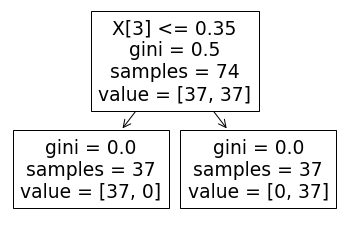

In [21]:
tree.plot_tree(clf)

In [22]:
X[Y==1][:,3].min()

0.45

In [23]:
X[Y==-1][:,3].max()

0.25

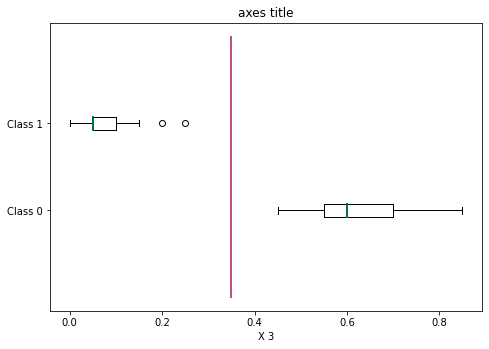

In [24]:
import matplotlib.pyplot as plt

data = [X[Y==1][:,3], X[Y==-1][:,3]]
labels = ['Class 0', 'Class 1']

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,labels=labels,vert=False)

for median in bp['medians']:
    median.set(color ='#00763C',linewidth = 2)

ax.vlines(0.35,0,3, color = '#A71E3B')

ax.set_title('axes title')
ax.set_xlabel('X 3')
#ax.set_ylabel('IRIS Class')
plt.show()

## SVM

In [25]:
clf = svm.SVC()

In [26]:
clf.fit(X_train, Y_train)

SVC()

In [27]:
clf.score(X_val,Y_val)

1.0

In [28]:
clf.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
clf.n_support_

array([4, 4])

In [30]:
clf.support_vectors_

array([[0.7 , 1.2 , 0.25, 0.15],
       [0.1 , 0.15, 0.15, 0.1 ],
       [0.4 , 0.9 , 0.45, 0.15],
       [0.25, 0.7 , 0.45, 0.05],
       [0.4 , 0.25, 1.  , 0.5 ],
       [0.35, 0.  , 1.25, 0.45],
       [0.85, 0.35, 2.05, 0.75],
       [1.35, 0.6 , 1.85, 0.65]])

## Naive Bayes

In [31]:
gnb = GaussianNB()

In [32]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [33]:
gnb.score(X_val,Y_val)

1.0

In [34]:
gnb.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}